# Основная информация по отчету
### ФИО - Мирасов Константин Владимирович
### ИСУ - 466716
### Практический поток - ИИИ 2.1

## Ход выполнения работы
#### 1. Выбрал дискретное (Биномиальное) и непрерывное (Нормальное) распределения
#### 2. Сгенерировал выборки по N=1000 для каждого
#### 3. Рассчитал описательные статистики для обеих выборок
#### 4. Построил графики эмпирических и теоретических распределений
#### 5. Исследовал устойчивость характеристик к выбросам

### Импортируем необходимые библиотеки

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Биномиальное и нормальное распределения

### Биномиальное распределение

**Биномиальное распределение** описывает количество успехов в серии независимых испытаний, каждое из которых имеет два исхода: успех (с вероятностью `p`) или неудача (с вероятностью `1 - p`).

#### Формула биномиального распределения:

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

где:  
- \( n \) — общее количество испытаний  
- \( k \) — число успехов  
- \( p \) — вероятность успеха  
- \( $\binom{n}{k}$ \) — биномиальный коэффициент:  
$$
\binom{n}{k} = \frac{n!}{k!(n - k)!}
$$

---

### Нормальное распределение

**Нормальное распределение** (или гауссовское распределение) — непрерывное распределение вероятностей, имеющее форму "колокола". Оно часто используется для моделирования случайных величин, распределённых вокруг среднего значения.

#### Формула плотности нормального распределения:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{ -\frac{(x - \mu)^2}{2\sigma^2} }
$$

где:  
- \( $\mu$ \) — математическое ожидание (среднее)  
- \( $\sigma$ \) — стандартное отклонение  
- \( x \) — значение случайной величины  
- \( e \) — основание натурального логарифма  
- \( $\pi$ \) — число пи (примерно 3.1416)

---

> При больших значениях \( n \), биномиальное распределение можно приближать нормальным (по центральной предельной теореме).


### Генерация данных
#### Параметры распределений:
#### - Биномиальное: n=10 испытаний, p=0.5
#### - Нормальное: μ=0, σ=1

In [3]:
np.random.seed(42)
N = 1000

# Дискретное распределение
binom_sample = np.random.binomial(n=10, p=0.5, size=N)

# Непрерывное распределение
norm_sample = np.random.normal(loc=0, scale=1, size=N)

### Расчет статистик

In [4]:
def calculate_statistics(sample):
    stats_dict = dict()
    
    # Квартили
    stats_dict["Q1"], stats_dict["Q2"], stats_dict["Q3"] = np.quantile(sample, [0.25, 0.5, 0.75])
    
    # Центральные тенденции
    stats_dict["Mean"] = np.mean(sample)
    stats_dict["Median"] = np.median(sample)
    
    mode_result = stats.mode(sample, axis=None, keepdims=True)
    stats_dict["Mode"] = mode_result.mode[0] if mode_result.count[0] > 0 else None  
    
    # Вариабельность
    stats_dict["Range"] = np.ptp(sample)
    stats_dict["IQR"] = stats_dict["Q3"] - stats_dict["Q1"]
    stats_dict["Variance"] = np.var(sample, ddof=1)
    stats_dict["Std"] = np.std(sample, ddof=1)
    stats_dict["CV"] = stats_dict["Std"] / stats_dict["Mean"] if stats_dict["Mean"] != 0 else np.nan
    stats_dict["MAD"] = np.mean(np.abs(sample - stats_dict["Mean"]))
    
    # Форма распределения
    stats_dict["Skew"] = stats.skew(sample, bias=False)
    stats_dict["Kurtosis"] = stats.kurtosis(sample, fisher=True, bias=False)
    
    # Моменты
    stats_dict["Raw Moments"] = [np.mean(sample**i) for i in range(1, 6)]
    
    deviations = sample - stats_dict["Mean"]
    stats_dict["Central Moments"] = [np.mean(deviations**i) for i in range(1, 6)]
    
    return stats_dict   

In [5]:
binom_stats = calculate_statistics(binom_sample)
norm_stats = calculate_statistics(norm_sample)

### Вывод таблиц статистик

In [6]:
print("Биномиальное распределение:")
for k, v in binom_stats.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

print("\nНормальное распределение:")
for k, v in norm_stats.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

Биномиальное распределение:
Q1: 4.0000
Q2: 5.0000
Q3: 6.0000
Mean: 4.9390
Median: 5.0000
Mode: 5
Range: 9
IQR: 2.0000
Variance: 2.4918
Std: 1.5785
CV: 0.3196
MAD: 1.2593
Skew: 0.0762
Kurtosis: -0.4337
Raw Moments: [np.float64(4.939), np.float64(26.883), np.float64(157.663), np.float64(981.171), np.float64(6409.759)]
Central Moments: [np.float64(-5.684341886080802e-17), np.float64(2.4892789999999994), np.float64(0.2987650379999998), np.float64(15.878309180477), np.float64(6.696418287944794)]

Нормальное распределение:
Q1: -0.5641
Q2: 0.0842
Q3: 0.7396
Mean: 0.0989
Median: 0.0842
Mode: -2.9214
Range: 6.1145
IQR: 1.3038
Variance: 0.9780
Std: 0.9889
CV: 9.9997
MAD: 0.7868
Skew: -0.0367
Kurtosis: -0.0212
Raw Moments: [np.float64(0.09889581794849281), np.float64(0.9867909352551125), np.float64(0.2554281929013593), np.float64(2.8811805437264413), np.float64(0.7538117574703636)]
Central Moments: [np.float64(-2.1316282072803006e-17), np.float64(0.9770105524474112), np.float64(-0.035405819242044

## Графики биномиального распределения

### 1. Эмпирическая и теоретическая PMF

**PMF (Probability Mass Function)** — функция вероятности дискретной случайной величины. Она показывает вероятность того, что случайная величина принимает конкретное значение.

- **Эмпирическая PMF** — гистограмма, построенная на основе наблюдаемых данных (выборки).
- **Теоретическая PMF** — значения функции биномиального распределения, вычисленные по формуле:

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

**На графике:**
- Синие столбцы — эмпирические частоты (гистограмма).
- Красные маркеры и пунктир — теоретическая функция вероятности для биномиального распределения.

---

### 2. ECDF и теоретическая CDF

**ECDF (Empirical Cumulative Distribution Function)** — эмпирическая функция распределения, показывает долю наблюдений, не превышающих данное значение.

**CDF (Cumulative Distribution Function)** — теоретическая функция распределения, определяет вероятность того, что случайная величина примет значение, меньшее или равное заданному:

$$
F(x) = P(X \le x)
$$

Для биномиального распределения CDF — это сумма вероятностей до заданного значения:

$$
F(x) = \sum_{k=0}^{\lfloor x \rfloor} \binom{n}{k} p^k (1 - p)^{n - k}
$$

**На графике:**
- Синяя ступенчатая линия — ECDF на основе выборки.
- Красная пунктирная ступенчатая линия — теоретическая CDF биномиального распределения.

> Обе функции (ECDF и CDF) отображаются **ступенчато**, так как биномиальное распределение — **дискретное**.

---

### Вывод

- При большом размере выборки эмпирическая PMF и ECDF хорошо приближают теоретические распределения.
- Совпадение графиков указывает на корректность модели и параметров \( n \) и \( p \).


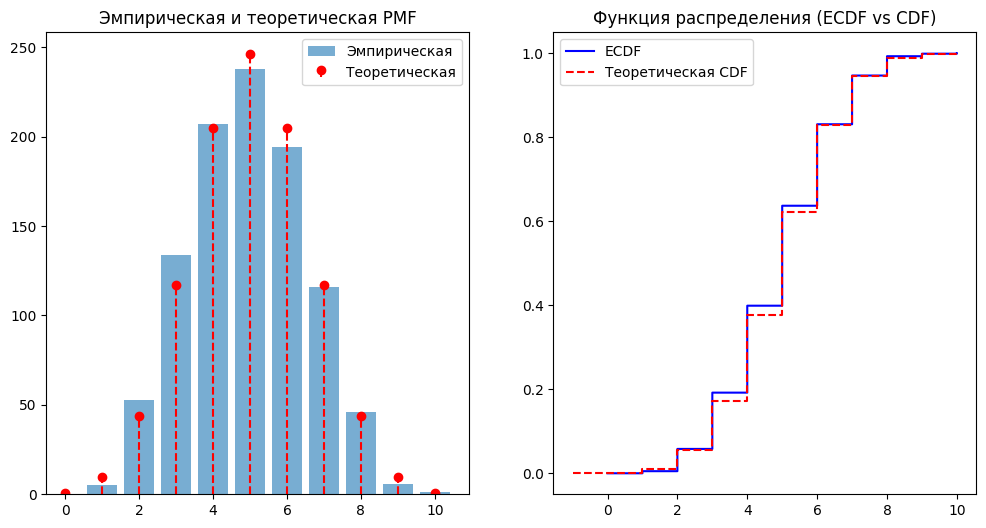

In [9]:
plt.figure(figsize=(12, 6))

# Эмпирическая и теоретическая PMF
x_binom = np.arange(0, 11)
plt.subplot(121)
values, counts = np.unique(binom_sample, return_counts=True)
plt.bar(values, counts, width=0.8, alpha=0.6, label="Эмпирическая")
plt.stem(x_binom, stats.binom.pmf(x_binom, n=10, p=0.5) * N,
         linefmt='r--', markerfmt='ro', basefmt=' ', label="Теоретическая")
plt.legend()
plt.title("Эмпирическая и теоретическая PMF")

# ECDF
plt.subplot(122)
x = np.sort(binom_sample)
y = np.arange(1, len(x) + 1) / len(x)
x_ecdf = np.concatenate([[x[0] - 1], x])
y_ecdf = np.concatenate([[0], y])
plt.step(x_ecdf, y_ecdf, where="post", label="ECDF", color='blue')
x_theor = np.arange(0, 11)
y_theor = stats.binom.cdf(x_theor, n=10, p=0.5)
x_cdf = np.concatenate([[x_theor[0] - 1], x_theor])
y_cdf = np.concatenate([[0], y_theor])
plt.step(x_cdf, y_cdf, where="post", label="Теоретическая CDF", color='red', linestyle='--')

plt.title("Функция распределения (ECDF vs CDF)")
plt.legend()

## Графики нормального распределения

### 1. Эмпирическая и теоретическая PDF

**PDF (Probability Density Function)** — функция плотности вероятности непрерывной случайной величины. Она показывает, как "плотно" распределены значения около среднего.

Для **нормального распределения** формула PDF:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \cdot e^{ -\frac{(x - \mu)^2}{2\sigma^2} }
$$

где:  
- \( $\mu$ \) — математическое ожидание (среднее)  
- \( $\sigma$ \) — стандартное отклонение  
- \( x \) — значение случайной величины

**На графике:**
- Гистограмма с параметром `density=True` — **эмпирическая оценка PDF** на основе выборки.
- Плавная кривая — **теоретическая PDF** нормального распределения.

> Теоретическая PDF — **не вероятность в точке**, а плотность. Площадь под кривой на интервале = вероятность.

---

### 2. ECDF и теоретическая CDF

**ECDF (Empirical Cumulative Distribution Function)** — ступенчатая функция, показывающая долю наблюдений, не превышающих конкретное значение.

**CDF (Cumulative Distribution Function)** для нормального распределения:

$$
F(x) = \frac{1}{2} \left[1 + \operatorname{erf}\left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right]
$$

где `erf` — функция ошибок.

**На графике:**
- Синяя ступенчатая линия — ECDF из выборки.
- Красная плавная линия — теоретическая CDF.

> В отличие от биномиального распределения, нормальное — **непрерывное**, поэтому теоретическая CDF отображается как **гладкая кривая**.

---

### Вывод

- Эмпирическая гистограмма и ECDF приближают теоретические кривые, если данные действительно подчиняются нормальному распределению.
- Сравнение визуальных графиков — хороший способ оценить **соответствие распределения модели**.

---

### Дополнительно

- Проверку нормальности можно усилить с помощью тестов: Shapiro–Wilk, Kolmogorov–Smirnov, QQ-плоты.


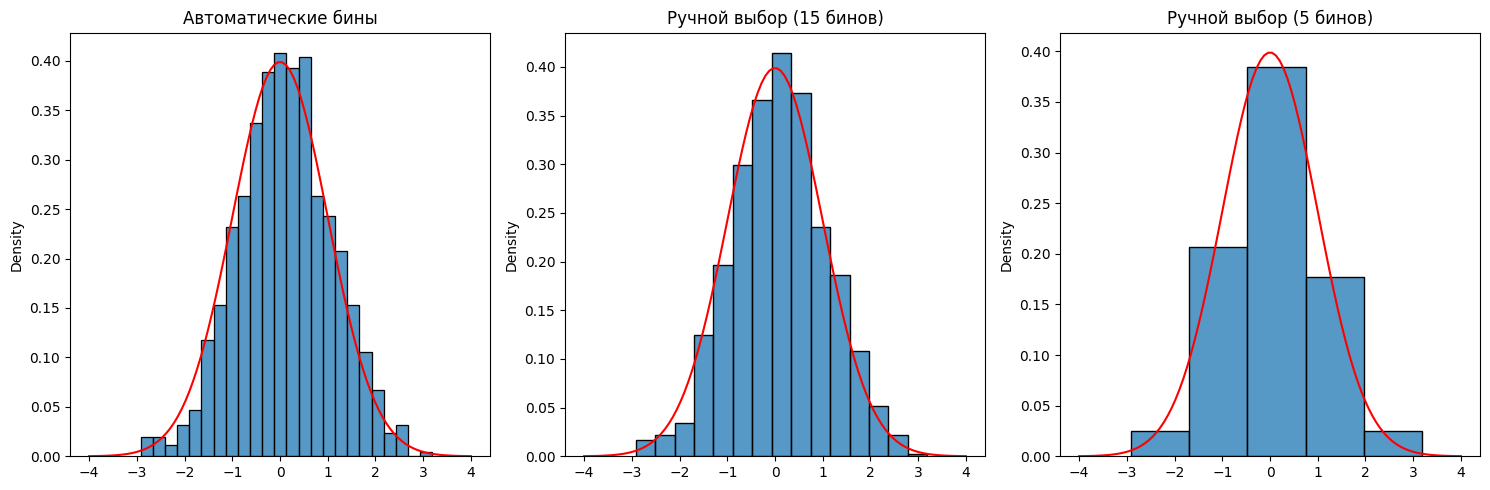

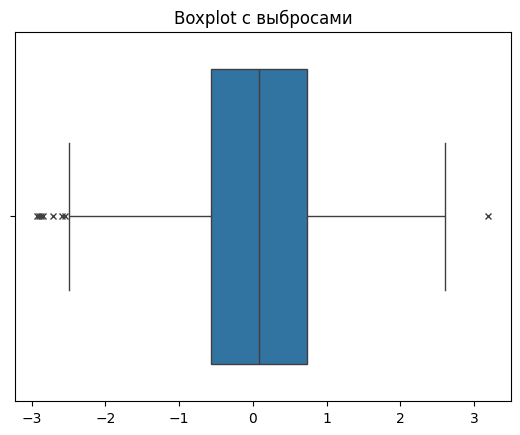

In [10]:
plt.figure(figsize=(15, 5))

# Гистограммы
plt.subplot(131)
sns.histplot(norm_sample, kde=False, stat="density", bins="auto")
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x), "r-")
plt.title("Автоматические бины")

plt.subplot(132)
sns.histplot(norm_sample, kde=False, stat="density", bins=15)
plt.plot(x, stats.norm.pdf(x), "r-")
plt.title("Ручной выбор (15 бинов)")

plt.subplot(133)
sns.histplot(norm_sample, kde=False, stat="density", bins=5)
plt.plot(x, stats.norm.pdf(x), "r-")
plt.title("Ручной выбор (5 бинов)")
plt.tight_layout()

# Boxplot
plt.figure()
sns.boxplot(x=norm_sample, flierprops={"marker": "x", "markersize": 4})
plt.title("Boxplot с выбросами")
plt.show()

### Анализ устойчивости к выбросам

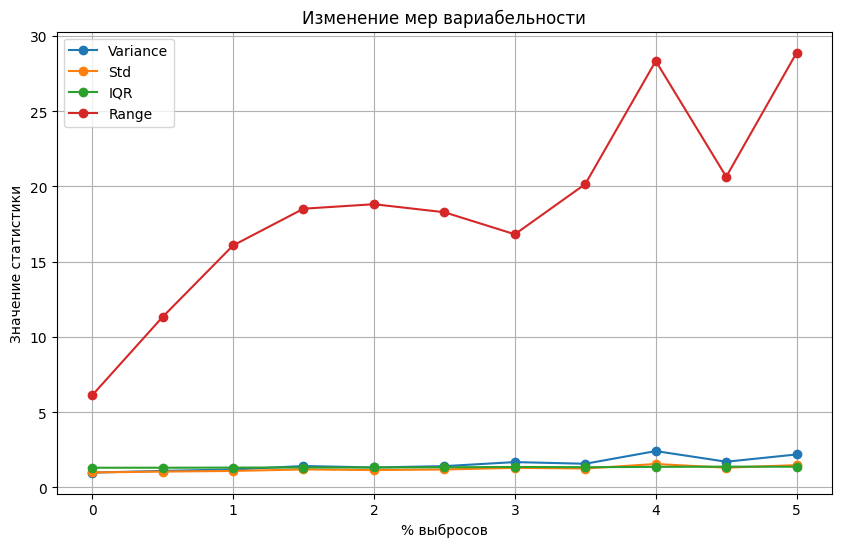

In [ ]:
def add_outliers(sample, perc):
    n_outliers = int(len(sample) * perc)
    # Генерация выбросов
    outliers = np.random.normal(loc=0, scale=5, size=n_outliers)
    return np.concatenate([sample, outliers])


# Постепенное добавление выбросов
metrics = {"Variance": [], "Std": [], "IQR": [], "Range": []}
percentages = np.linspace(0, 0.05, 11)

for p in percentages:
    contaminated = add_outliers(norm_sample, p)
    stats_count = calculate_statistics(contaminated)
    for m in metrics:
        metrics[m].append(stats_count[m])
        
# Графики изменений
plt.figure(figsize=(10, 6))
for m, values in metrics.items():
    plt.plot(percentages * 100, values, "o-", label=m)
plt.xlabel("% выбросов")
plt.ylabel("Значение статистики")
plt.title("Изменение мер вариабельности")
plt.legend()
plt.grid()
plt.show()

## Заключение
#### 1. **Устойчивые статистики**: Медиана, IQR и мода показали устойчивость к выбросам.  
#### 2. **Чувствительные статистики**: Среднее, дисперсия и стандартное отклонение значительно меняются при добавлении выбросов.  
#### 3. **Визуализация**: Гистограммы с ручным выбором бинов точнее отражают форму распределения.  
#### 4. **Практическая значимость**: Для данных с потенциальными выбросами рекомендуется использовать устойчивые метрики (медиана, IQR) вместо чувствительных (среднее, дисперсия).  
#### 5. **Эмпирические распределения**: Хорошо согласуются с теоретическими при достаточном объеме данных (N=1000).